# Token Naturalness Analysis

Exploratory data analysis to observe various relationships between token vocabulary, identifier tokenization, and natural English words.

```
Copyright 2024 Kyle Luoma

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.
```

In [1]:
import src.word_list_matching as wlm
import pandas as pd
import seaborn as sns

In [2]:
token_file = "./data/tokenizer_analysis/identifier-tokens-all-models.xlsx"
token_df = pd.read_excel(token_file)
token_df["native_tokens"] = token_df.apply(
    lambda row: {
        "N1": row.N1_tokens,
        "N2": row.N2_tokens,
        "N3": row.N3_tokens
    }[row.native_naturalness] 
    if row.native_naturalness in ["N1", "N2", "N3"]
    else "[]",
    axis=1
)
identifier_token_df = token_df[["model", "source_database", "native_identifier", "native_naturalness", "native_tokens"]]

In [3]:
token_df.query("native_identifier == 'EMSCARE'")

,Unnamed: 0.1,Unnamed: 0,native_identifier,table_or_column,source_database,native_naturalness,N1_identifier,N2_identifier,N3_identifier,errors,...,native_tokens,native_token_count,native_char_count,N1_char_count,N2_char_count,N3_char_count,native_identifier_token_char_ratio,N1_identifier_token_char_ratio,N2_identifier_token_char_ratio,N3_identifier_token_char_ratio
6721,272,NaN,EMSCARE,table,NTSB,N2,EMERGENCY_MEDICAL_SERVICES_CARE,EMSCARE,EMS_CR,NaN,...,"['<s>', 'E', 'MS', 'CA', 'RE']",4,7,31,7,6,0.571429,0.580645,0.571429,0.666667
6722,273,NaN,EMSCARE,column,NTSB,N2,EMERGENCY_MEDICAL_SERVICES_CARE_TYPE,EMSCARE,EMS_CR,NaN,...,"['<s>', 'E', 'MS', 'CA', 'RE']",4,7,36,7,6,0.571429,0.555556,0.571429,0.666667
14175,272,NaN,EMSCARE,table,NTSB,N2,EMERGENCY_MEDICAL_SERVICES_CARE,EMSCARE,EMS_CR,NaN,...,"['<bos>', 'EM', 'SC', 'ARE']",3,7,31,7,6,0.428571,0.225806,0.428571,0.500000
14176,273,NaN,EMSCARE,column,NTSB,N2,EMERGENCY_MEDICAL_SERVICES_CARE_TYPE,EMSCARE,EMS_CR,NaN,...,"['<bos>', 'EM', 'SC', 'ARE']",3,7,36,7,6,0.428571,0.250000,0.428571,0.500000
21629,272,NaN,EMSCARE,table,NTSB,N2,EMERGENCY_MEDICAL_SERVICES_CARE,EMSCARE,EMS_CR,NaN,...,"['EM', 'SC', 'ARE']",3,7,31,7,6,0.428571,0.290323,0.428571,0.333333
21630,273,NaN,EMSCARE,column,NTSB,N2,EMERGENCY_MEDICAL_SERVICES_CARE_TYPE,EMSCARE,EMS_CR,NaN,...,"['EM', 'SC', 'ARE']",3,7,36,7,6,0.428571,0.277778,0.428571,0.333333
29083,272,NaN,EMSCARE,table,NTSB,N2,EMERGENCY_MEDICAL_SERVICES_CARE,EMSCARE,EMS_CR,NaN,...,"['[CLS]', 'ems', '##care', '[SEP]']",2,7,31,7,6,0.285714,0.225806,0.285714,0.500000
29084,273,NaN,EMSCARE,column,NTSB,N2,EMERGENCY_MEDICAL_SERVICES_CARE_TYPE,EMSCARE,EMS_CR,NaN,...,"['[CLS]', 'ems', '##care', '[SEP]']",2,7,36,7,6,0.285714,0.250000,0.285714,0.500000


In [4]:
identifier_token_df.head(3)

,model,source_database,native_identifier,native_naturalness,native_tokens
0,code-llama,NYSED_SRC2022,ABSENT_COUNT,N2,"['<s>', 'A', 'BS', 'ENT', '_', 'COUNT']"
1,code-llama,NYSED_SRC2022,ACC_EM_Chronic_Absenteeism,N2,"['<s>', 'A', 'CC', '_', 'EM', '_', 'Chr', 'oni..."
2,code-llama,NYSED_SRC2022,ACC_EM_Core_and_Weighted_Performance,N2,"['<s>', 'A', 'CC', '_', 'EM', '_', 'Core', '_'..."


In [5]:
nc = wlm.NaturalnessCalculator(
    # excel_file="./words/words_vectorized.xlsx"
    )

Initializing letter count matrix...
Letter count matrix initialized.
Vectorizing words letter counts...
Vectorization complete.
Creating dataframe...


In [6]:
from tqdm import tqdm

In [7]:
if True:
    tn_dict = {
        "model": [],
        "source_database": [],
        "native_identifier": [],
        "native_naturalness": [],
        "native_token": []
    }
    exclude_tokens = ["[CLS]", "[SEP]", "<s>", "<bos>"]
    remove_sequences = ["##"]
    token_list = []
    for row in tqdm(identifier_token_df.itertuples(), total=identifier_token_df.shape[0]):
        tokens = row.native_tokens.replace("[", "").replace("]", "").replace("'", "").strip()
        tokens = [t.strip() for t in tokens.split(",")]
        for rs in remove_sequences:
            tokens = [t.replace(rs, "") for t in tokens]
        tokens = [t for t in tokens if t not in exclude_tokens]
        for t in tokens:
            token_list.append(t.lower())
            tn_dict["model"].append(row.model)
            tn_dict["source_database"].append(row.source_database)
            tn_dict["native_identifier"].append(row.native_identifier)
            tn_dict["native_naturalness"].append(row.native_naturalness)
            tn_dict["native_token"].append(t)
    token_dist_dict = nc.mp_get_min_distance_for_word_list(token_list)
    tok_nat_df = pd.DataFrame(tn_dict)
    tok_nat_df["token_nat_dist"] = tok_nat_df.apply(
        lambda row: token_dist_dict[row.native_token.lower()] 
        if row.native_token.lower() in token_dist_dict else -1,
        axis=1
    )
    tok_nat_df.to_excel("./data/tokenizer_analysis/token_edit_distance_all_models.xlsx", index=False)
else:
    tok_nat_df = pd.read_excel("./data/tokenizer_analysis/token_edit_distance_all_models.xlsx")
tok_nat_df



100%|██████████| 29816/29816 [00:00<00:00, 426929.15it/s]


Starting process <Process name='Process-2' parent=2640 initial>
Starting process <Process name='Process-3' parent=2640 initial>
Starting process <Process name='Process-4' parent=2640 initial>
Starting process <Process name='Process-5' parent=2640 initial>
Starting process <Process name='Process-6' parent=2640 initial>
Starting process <Process name='Process-7' parent=2640 initial>
Starting process <Process name='Process-8' parent=2640 initial>
Starting process <Process name='Process-9' parent=2640 initial>
Starting process <Process name='Process-10' parent=2640 initial>
Starting process <Process name='Process-11' parent=2640 initial>
Starting process <Process name='Process-12' parent=2640 initial>
Starting process <Process name='Process-13' parent=2640 initial>
Starting process <Process name='Process-14' parent=2640 initial>
Starting process <Process name='Process-15' parent=2640 initial>
Starting process <Process name='Process-16' parent=2640 initial>
Starting process <Process name='P

,model,source_database,native_identifier,native_naturalness,native_token,token_nat_dist
0,code-llama,NYSED_SRC2022,ABSENT_COUNT,N2,A,2
1,code-llama,NYSED_SRC2022,ABSENT_COUNT,N2,BS,1
2,code-llama,NYSED_SRC2022,ABSENT_COUNT,N2,ENT,2
3,code-llama,NYSED_SRC2022,ABSENT_COUNT,N2,_,3
4,code-llama,NYSED_SRC2022,ABSENT_COUNT,N2,COUNT,0
...,...,...,...,...,...,...
113170,code-bison,ATBI,Ycoord,N2,CLS,1
113171,code-bison,ATBI,Ycoord,N2,y,2
113172,code-bison,ATBI,Ycoord,N2,co,1
113173,code-bison,ATBI,Ycoord,N2,ord,2


In [8]:
tok_nat_df["token_char_len"] = tok_nat_df.native_token.apply(lambda x: len(x))

In [9]:
tok_nat_df["relative_edit_distance"] = tok_nat_df.apply(
    lambda row: row.token_nat_dist / (row.token_char_len) if row.token_char_len > 0 else 0,
    axis=1
)

In [10]:
tok_nat_df["token_in_dictionary"] = tok_nat_df.apply(
    lambda row: 0 if row.token_nat_dist > 0 else 1,
    axis=1
)

In [11]:
tok_nat_df["native_naturalness"] = tok_nat_df["native_naturalness"].dropna().apply(
    lambda x: {"N1": "Regular", "N2": "Low", "N3": "Least", "UNK": "Unknown"}[x]
)

In [12]:
tok_nat_df.model.unique()

array(['code-llama', 'gemini', 'gpt-35-turbo-16k', 'code-bison'],
      dtype=object)

In [13]:
tok_nat_df["model"] = tok_nat_df["model"].apply(
    lambda x: {
        "code-bison": "code-bison",
        "code-llama": "Llama2",
        "gemini": "Gemini",
        "gpt-35-turbo-16k": "GPT"
    } [x]
    )

In [14]:
alpha_tok_nat_df = tok_nat_df.query("~native_token.str.isnumeric()")

In [15]:
alpha_tok_nat_df.query("native_identifier == 'EMSCARE'")

,model,source_database,native_identifier,native_naturalness,native_token,token_nat_dist,token_char_len,relative_edit_distance,token_in_dictionary
24484,Llama2,NTSB,EMSCARE,Low,E,2,1,2.000000,0
24485,Llama2,NTSB,EMSCARE,Low,MS,1,2,0.500000,0
24486,Llama2,NTSB,EMSCARE,Low,CA,1,2,0.500000,0
24487,Llama2,NTSB,EMSCARE,Low,RE,1,2,0.500000,0
24488,Llama2,NTSB,EMSCARE,Low,E,2,1,2.000000,0
24489,Llama2,NTSB,EMSCARE,Low,MS,1,2,0.500000,0
24490,Llama2,NTSB,EMSCARE,Low,CA,1,2,0.500000,0
24491,Llama2,NTSB,EMSCARE,Low,RE,1,2,0.500000,0
47514,Gemini,NTSB,EMSCARE,Low,EM,1,2,0.500000,0
47515,Gemini,NTSB,EMSCARE,Low,SC,1,2,0.500000,0


### Token Naturalness Edit Distance

Token naturalness distance is the distance, measured using Levenshtein distance, from an identifier token and the closest word in the English dictionary.

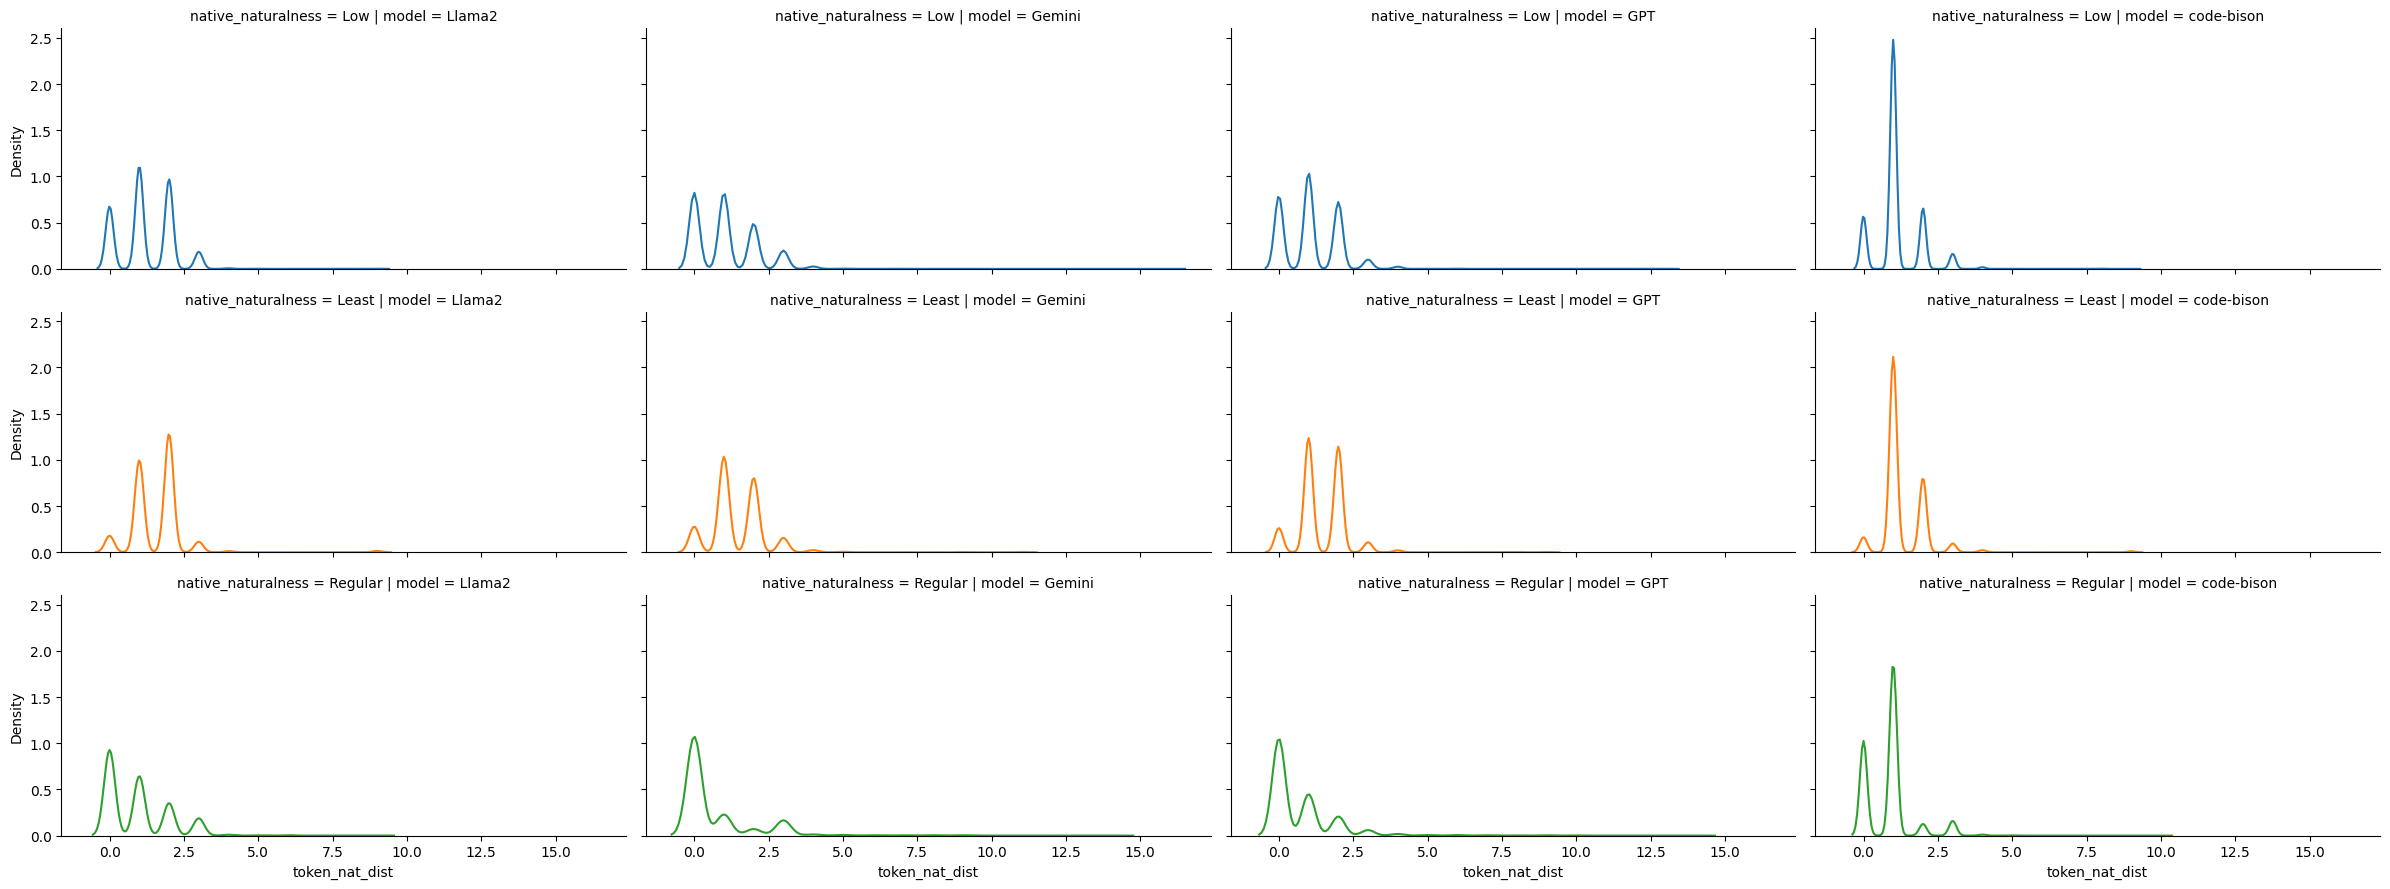

In [16]:
g = sns.FacetGrid(
    data=alpha_tok_nat_df.query("native_naturalness != 'Unknown' and token_nat_dist >= 0"),
    row="native_naturalness",
    hue="native_naturalness",
    col="model",
    aspect=2
)
g.map(
    sns.kdeplot,
    "token_nat_dist",
)

### Token character length

Token character length is the number of characters in a single token

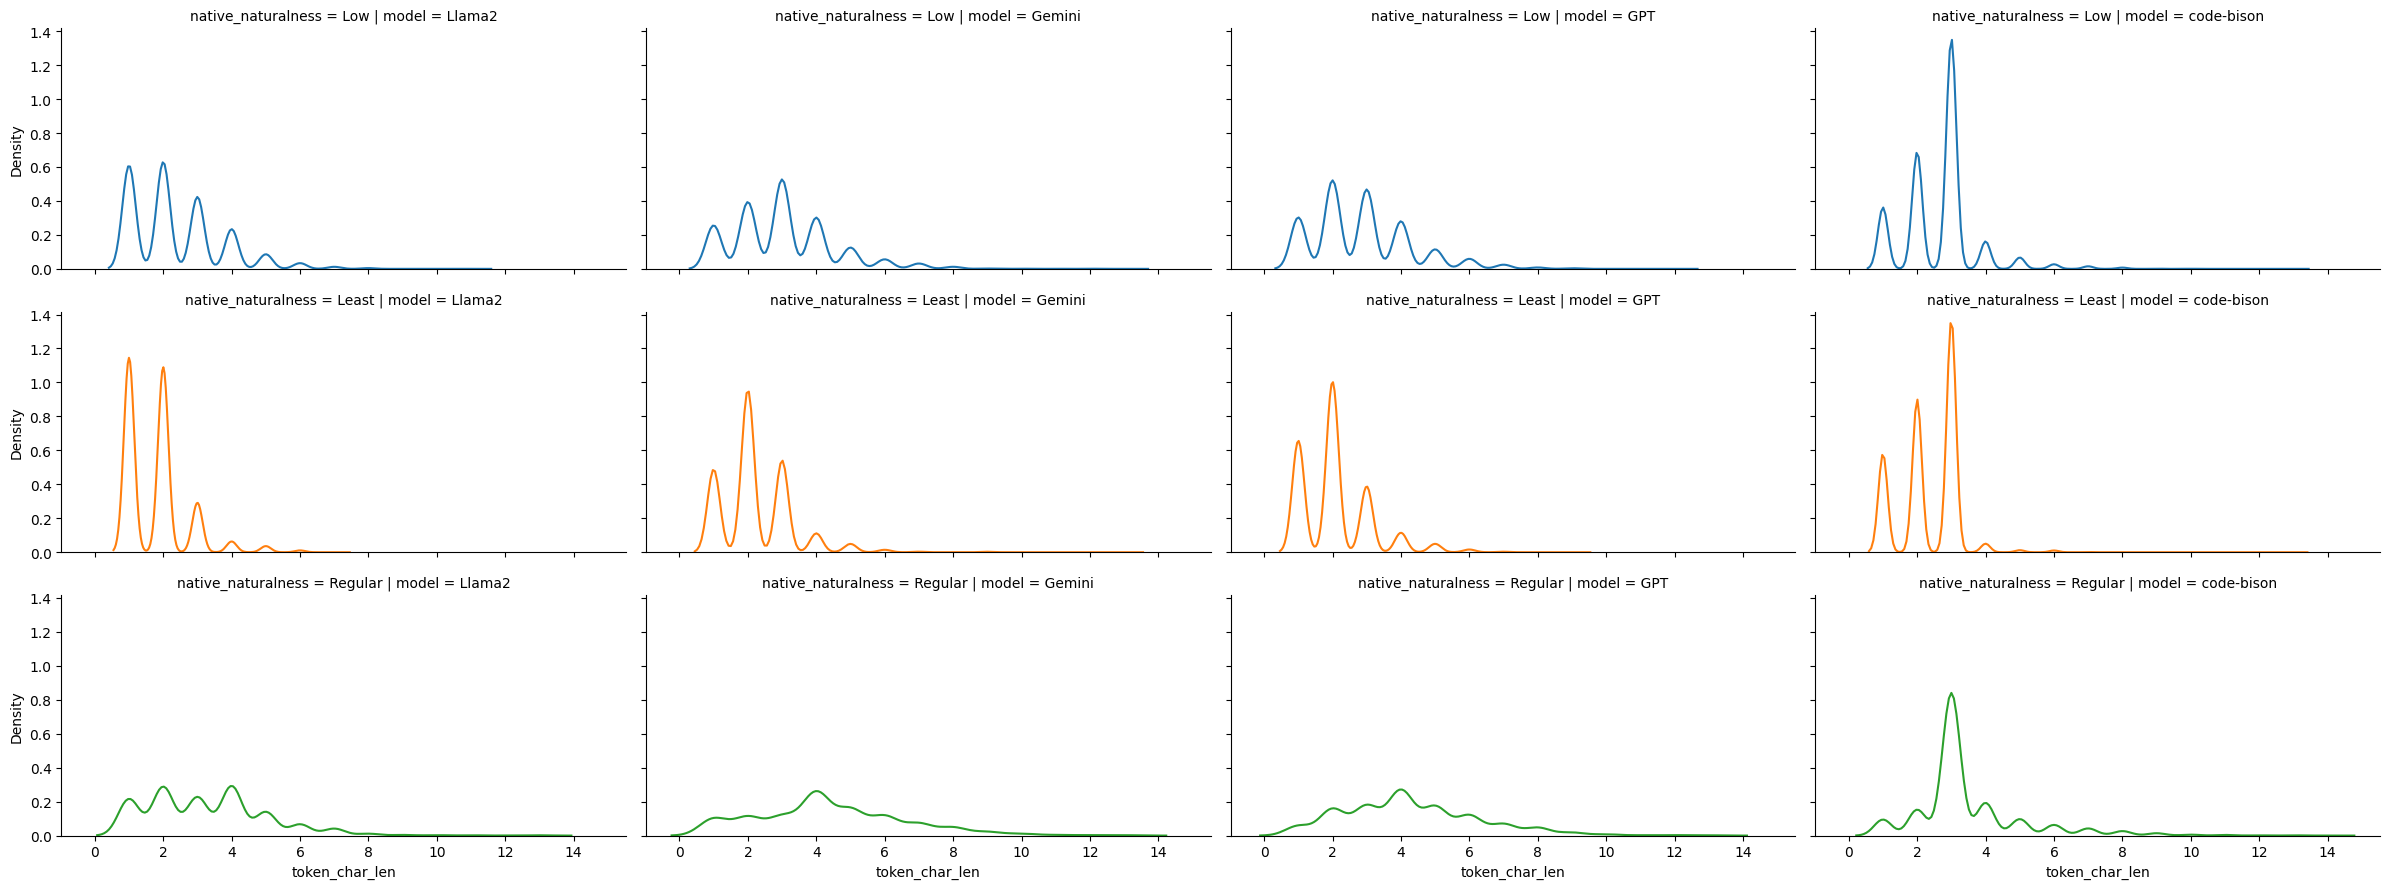

In [17]:
g = sns.FacetGrid(
    data=alpha_tok_nat_df.query("native_naturalness != 'UNK' and token_nat_dist >= 0"),
    row="native_naturalness",
    hue="native_naturalness",
    aspect=2,
    col="model"
)
g.map(
    sns.kdeplot,
    "token_char_len",
)

### Relative Edit Distance (RED)

Relative edit distance is the edit distance (Levenshtein) relative to the number of characters in the token.

It is calculated as $distance / character count$ so that lower RED indicates fewer edits per character.

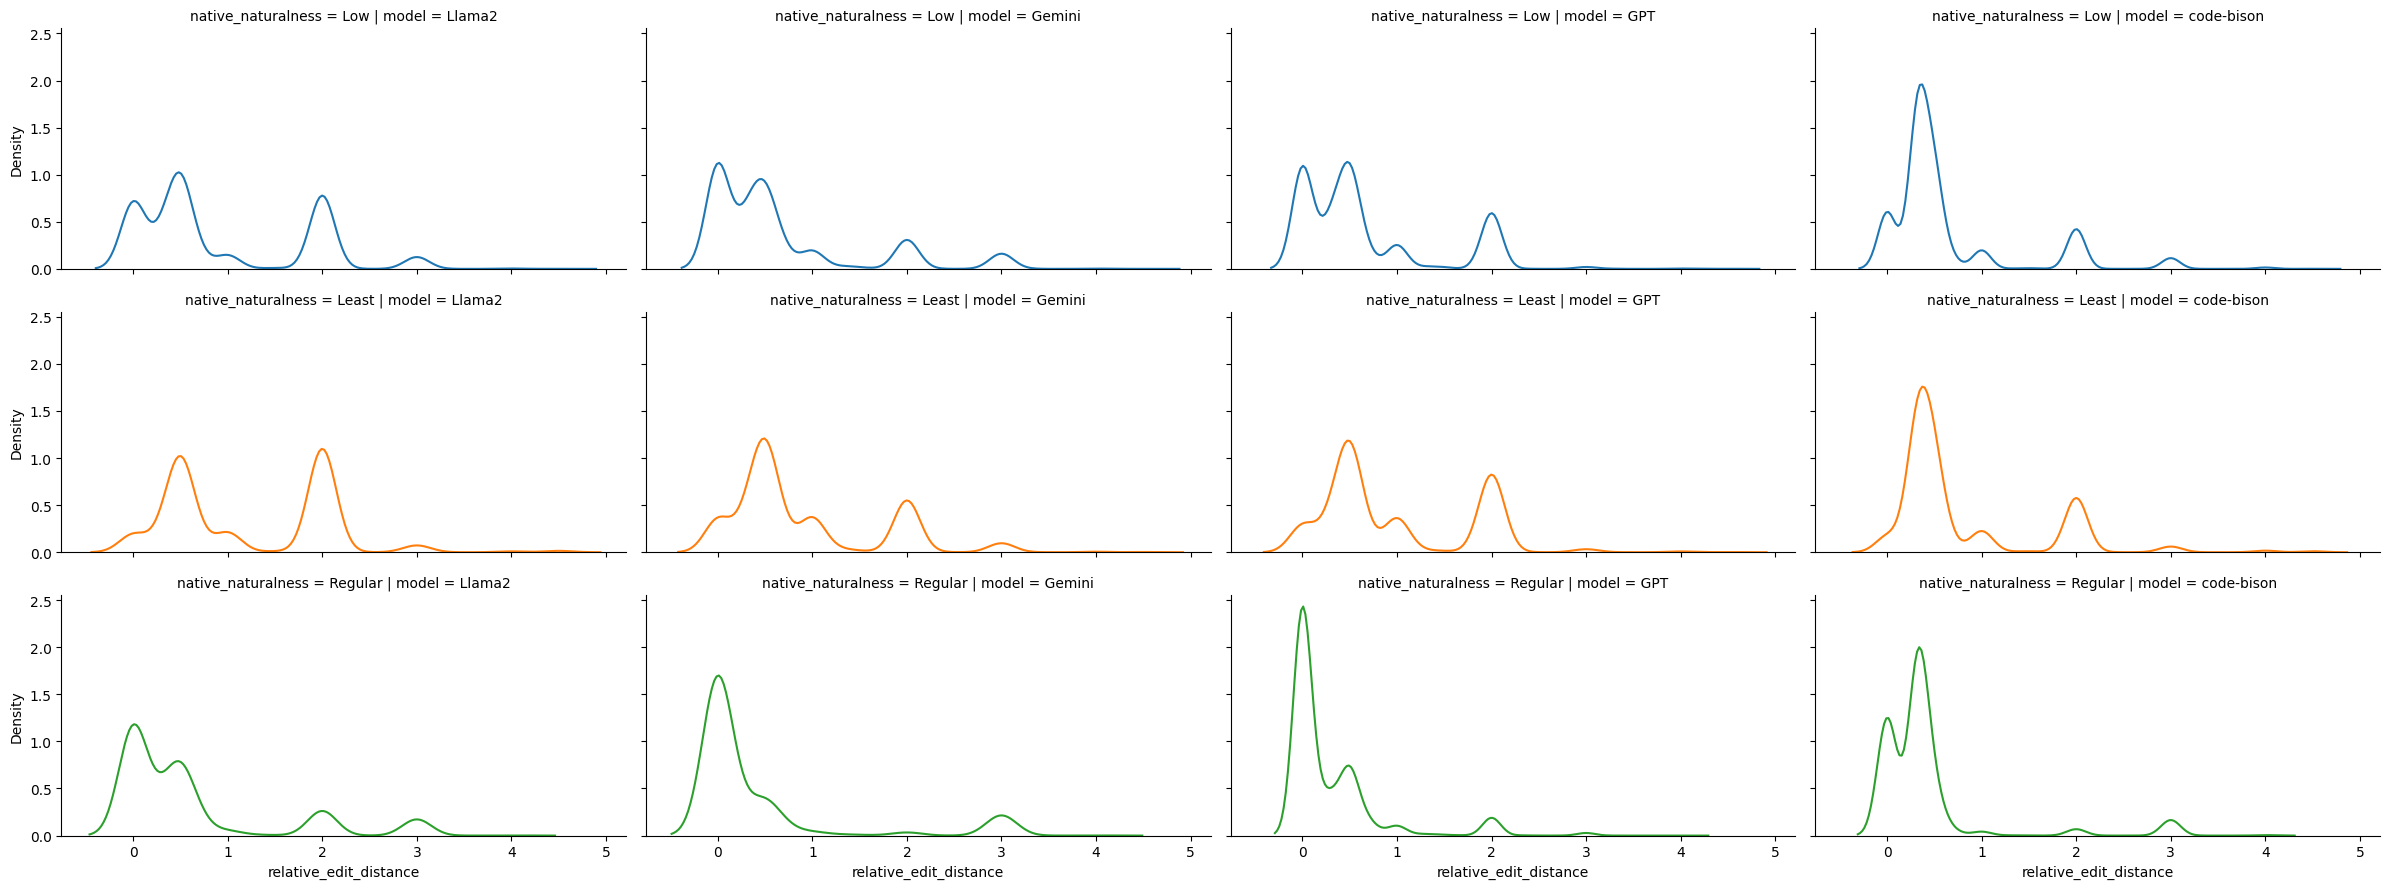

In [18]:
g = sns.FacetGrid(
    data=alpha_tok_nat_df.query("native_naturalness != 'UNK' and token_nat_dist >= 0"),
    row="native_naturalness",
    col="model",
    hue="native_naturalness",
    aspect=2
)
g.map(
    sns.kdeplot,
    "relative_edit_distance",
)

In [19]:
ident_nat_df = alpha_tok_nat_df[["model", "native_naturalness", "source_database", "native_identifier", "token_nat_dist", "token_char_len"]].groupby(
    by=["model", "native_naturalness", "source_database", "native_identifier"]
).sum().rename(
    columns={"token_nat_dist": "sum_token_nat_dist", "token_char_len": "sum_token_char_len"}
).join(
    alpha_tok_nat_df[[
        "model", "native_naturalness", "source_database", "native_identifier", 
        "relative_edit_distance", "token_nat_dist", "token_char_len",
        "token_in_dictionary"
        ]].groupby(
        by=["model", "native_naturalness", "source_database", "native_identifier"]
    ).mean().rename(
        columns={
            "relative_edit_distance": "mean_relative_edit_distance", 
            "token_nat_dist": "mean_token_nat_dist", 
            "token_char_len": "mean_token_char_len",
            "token_in_dictionary": "mean_token_in_dictionary"
            }
    )
)
ident_nat_df

sum_token_nat_dist  \
model      native_naturalness source_database                native_identifier                                
GPT        Least              ASIS_20161108_HerpInv_Database EstHError                                    3   
                                                             LatY                                         3   
                                                             LonX                                         5   
                                                             SSMA_TimeStamp                               3   
                                                             SVL                                          4   
...                                                                                                     ...   
code-bison Regular            SBODemoUS                      workState                                    3   
                                                             workStreet                                   4   
                                                             workZip                                      5   
                                                             zip                                          2   
           Unknown            NTSB                           EVENT_DATA_RECORDER_SUMMNO                  -1   

                                                                                         sum_token_char_len  \
model      native_naturalness source_database                native_identifier                                
GPT        Least              ASIS_20161108_HerpInv_Database EstHError                                    9   
                                                             LatY                                         4   
                                                             LonX                                         4   
                                                             SSMA_TimeStamp                              14   
                                                             SVL                                          3   
...                                                                                                     ...   
code-bison Regular            SBODemoUS                      workState                                   15   
                                                             workStreet                                  16   
                                                             workZip                                     13   
                                                             zip                                          9   
           Unknown            NTSB                           EVENT_DATA_RECORDER_SUMMNO                   0   

                                                                                         mean_relative_edit_distance  \
model      native_naturalness source_database                native_identifier                                         
GPT        Least              ASIS_20161108_HerpInv_Database EstHError                                      0.777778   
                                                             LatY                                           1.166667   
                                                             LonX                                           2.166667   
                                                             SSMA_TimeStamp                                 0.300000   
                                                             SVL                                            1.500000   
...                                                                                                              ...   
code-bison Regular            SBODemoUS                      workState                                      0.229167   
                                                             workStreet                                     0.533333   
 

### Identifier-level aggregation

In this section, we look at identifier-level statistics where different measurements are aggregated as either sums or means.

The first chart below is a scatter plot with the sum of the token character lengths (so identifier character length) on the x axist, and the sum of the edit distance on the y axis. This approximately visualizes the relationship represented by RED.

<Axes: xlabel='sum_token_char_len', ylabel='sum_token_nat_dist'>

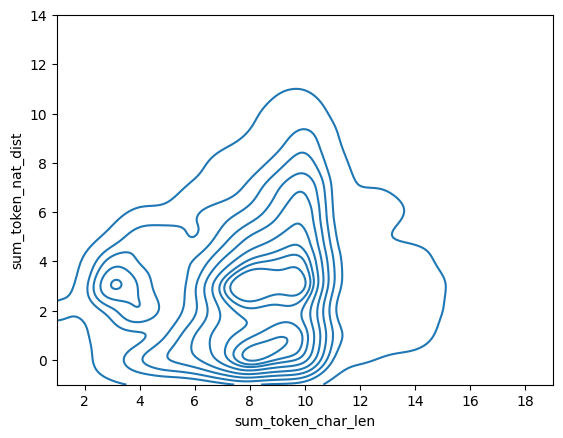

In [20]:
sns.kdeplot(
    data=ident_nat_df.query("native_naturalness != 'Unknown' and model == 'GPT' and sum_token_char_len < 20 and sum_token_nat_dist < 15"),
    x="sum_token_char_len",
    y="sum_token_nat_dist",
    # hue="native_naturalness",
    fill=False,
    cut=0,
    # levels=5,
    # thresh=.2
)

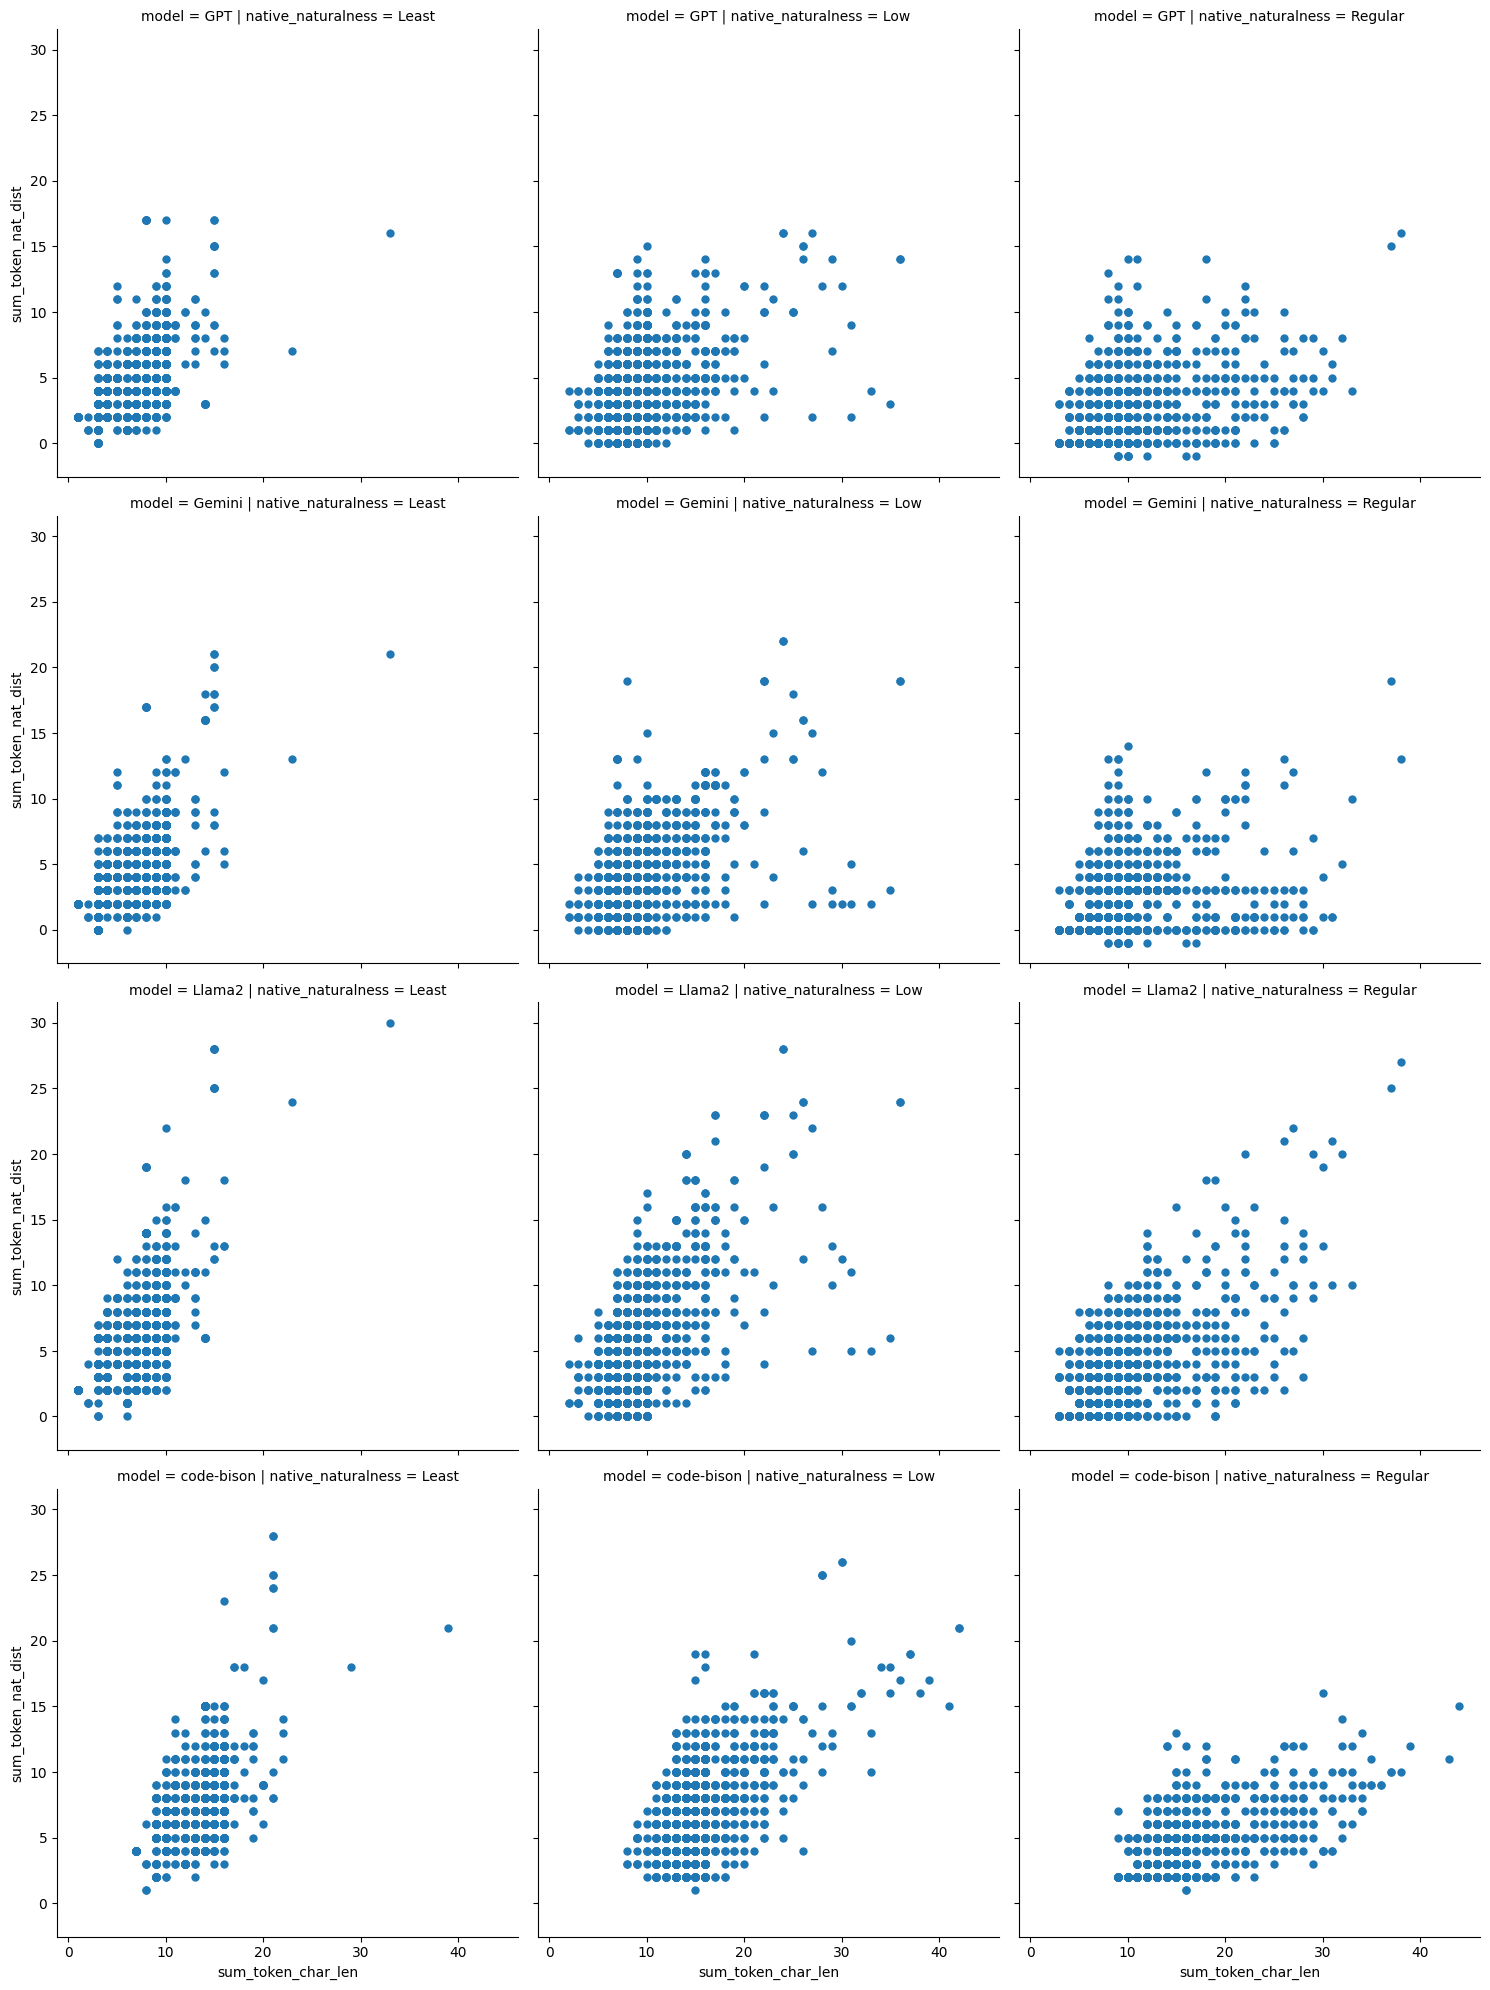

In [21]:
sns.relplot(
    data=ident_nat_df.query("native_naturalness != 'Unknown'"),
    x="sum_token_char_len",
    y="sum_token_nat_dist",
    col="native_naturalness",
    row="model",
    linewidth=0,
)

<Axes: xlabel='relative_edit_distance', ylabel='Count'>

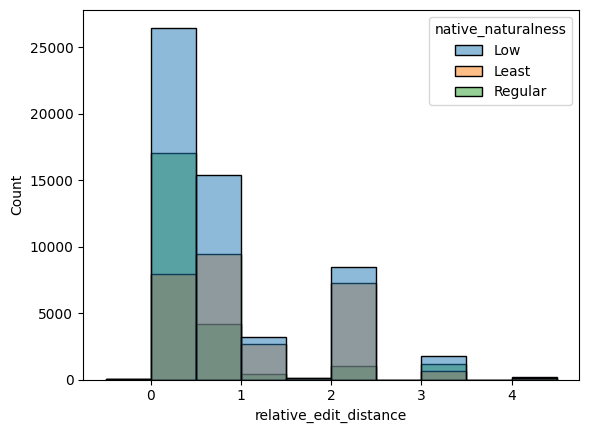

In [22]:
sns.histplot(
    data=alpha_tok_nat_df.query("native_naturalness != 'Unknown'"),
    x="relative_edit_distance",
    hue="native_naturalness",
    bins=10
)

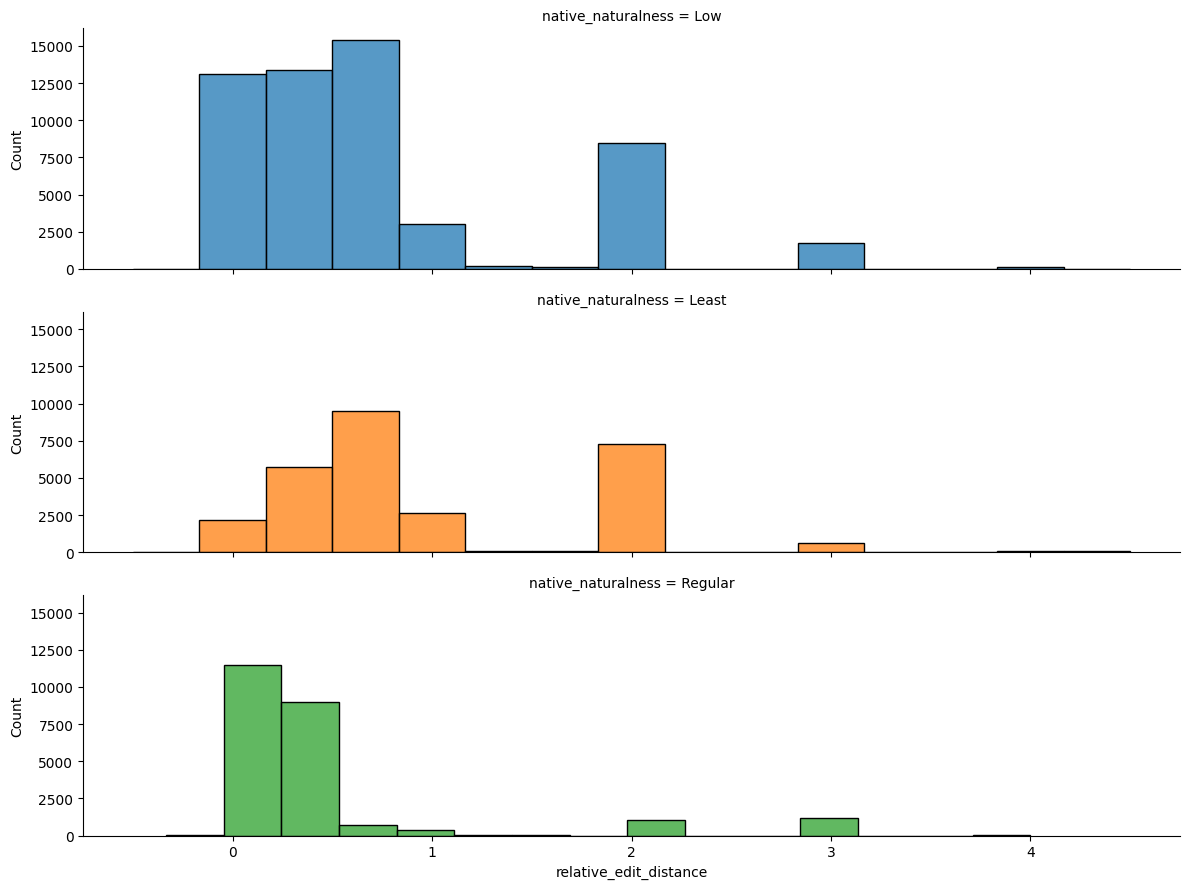

In [23]:
g = sns.FacetGrid(
    data=alpha_tok_nat_df.reset_index().query("native_naturalness != 'Unknown'"),
    row="native_naturalness",
    hue="native_naturalness",
    aspect=4
)
g.map(
    sns.histplot,
    "relative_edit_distance",
    bins=15
)

## Token in dictionary analysis

This section examines the distribution of tokens that are in or out of the natural English word dictionary. 

In-dictionary tokens are tokens with an edit distance of 0 from any 3 or more character word in the dictionary. Out-of-dictionary tokens are tokens with an edit distance of at least 1 from any English dictionary word.

#### Distribution of in- vs out-of-dictionary tokens

Naturally, there will be more out-of-dictionary tokens because we assume there will be more, smaller, tokens that are between 1-3 characters and not natural words.

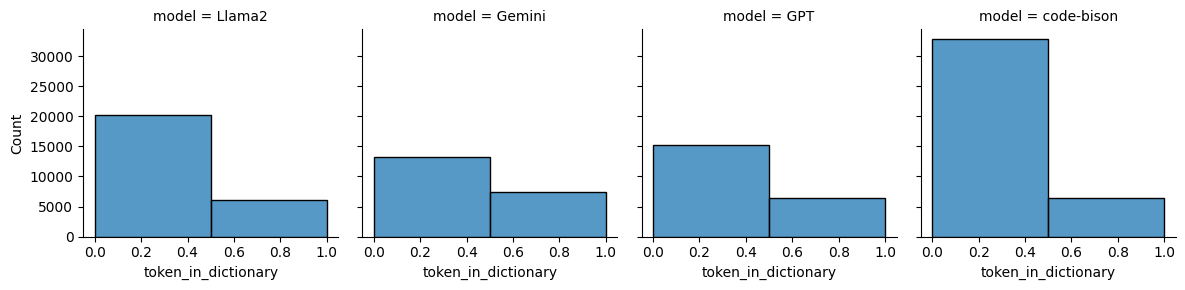

In [24]:
g = sns.FacetGrid(
    data=alpha_tok_nat_df,
    col="model"
)
g.map(
    sns.histplot,
    "token_in_dictionary",
    bins=2,
)



This plot shows is the distribution of tokens by the character length for in (1) and out (2) of dictionary tokens. This confirms that the majority of the out-of-dictionary tokens are shorter than the majority of in-dictionary tokens.

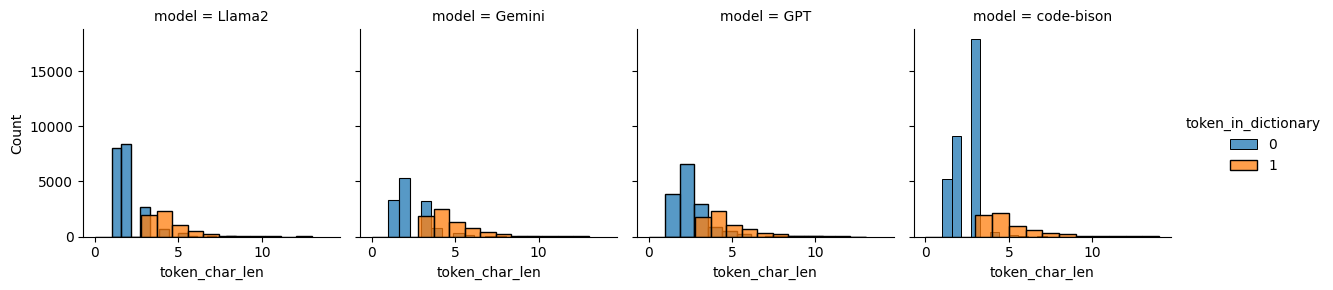

In [25]:
g = sns.FacetGrid(
    data=alpha_tok_nat_df,
    col="model",
    hue="token_in_dictionary"
)
g.map(
    sns.histplot,
    "token_char_len",
    bins=14,
)
g.add_legend()

#### Identifier-level analysis

Here we look at a variable called mean_token_in_dictionary, which is calculated as the mean of tokens in a specific identifier. What we get is a proportion of the identifier's tokens that are within 0 edit distance of a dictionary word. This means that an identifier with a score of 1 consists of all natural tokens, whereas an identifier with a score of 0 consists of no tokens in the English dictionary.

Interestingly, in the SNAILS dataset, we can see in the KDE a 3 or 4 peak distribution.

/home/kyle/SNAILS/venv/lib/python3.12/site-packages/seaborn/distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/home/kyle/SNAILS/venv/lib/python3.12/site-packages/seaborn/distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/home/kyle/SNAILS/venv/lib/python3.12/site-packages/seaborn/distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


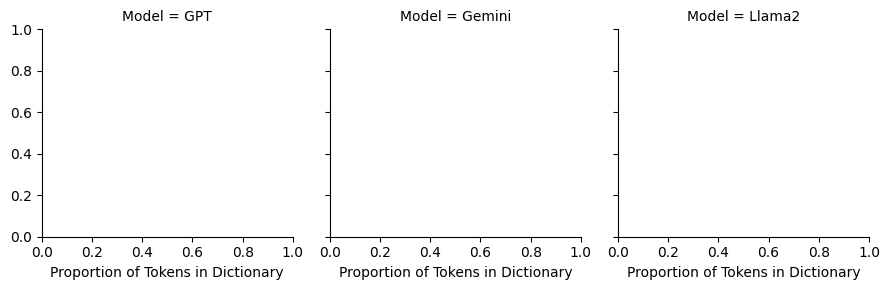

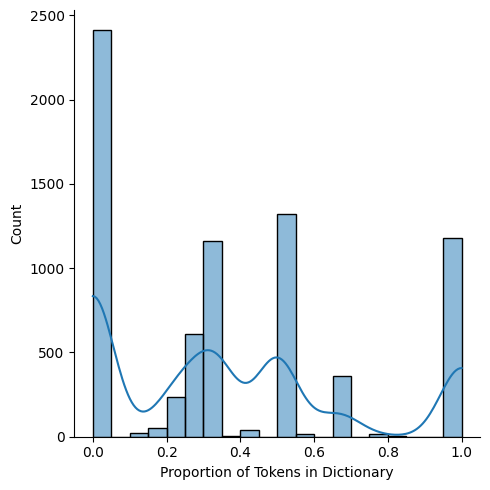

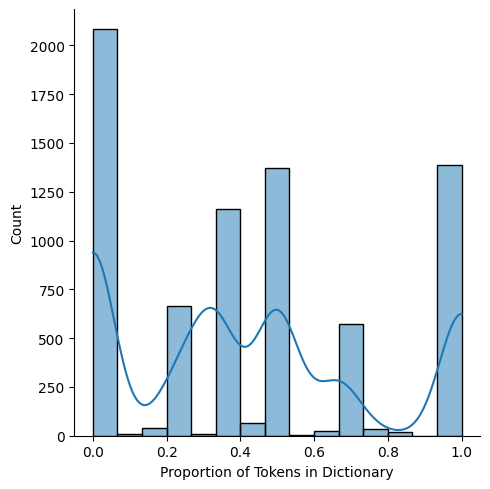

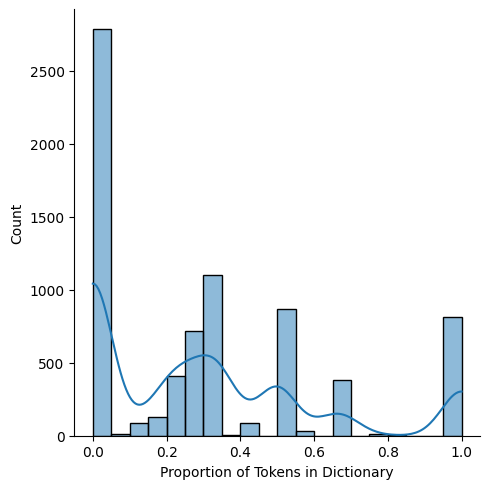

In [26]:
g = sns.FacetGrid(
    data=ident_nat_df.reset_index().query(
        "mean_token_in_dictionary >= 0 and model != 'code-bison'"
    ).rename(columns={
        "model": "Model",
        "mean_token_in_dictionary": "Proportion of Tokens in Dictionary"
    }),
    col="Model"
)
g.map(
    sns.displot,
    "Proportion of Tokens in Dictionary",
    kde=True,
    fill=True,
    # cut=0,
    # bw_adjust=.4
)

Some post-hoc evaluation shows us that the peaks in the above chart mostly align to our naturalness levels!

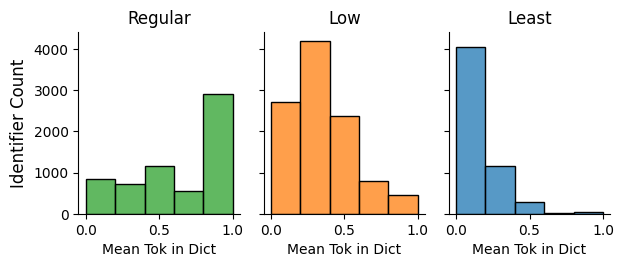

In [27]:
ident_nat_df["Mean Tok in Dict"] = ident_nat_df["mean_token_in_dictionary"]
g = sns.FacetGrid(
    data=ident_nat_df.reset_index().query(
        "mean_token_in_dictionary >= 0 and model != 'code-bison' and native_naturalness != 'Unknown'"
        ).sort_values(by="native_naturalness", ascending=False),
    col="native_naturalness",
    hue="native_naturalness",
    hue_order=["Least", "Low", "Regular"],
    aspect=.7
)
g.map(
    sns.histplot,
    "Mean Tok in Dict",
    fill=True,
    binwidth=.2,
    legend=False
)
# g.add_legend(loc="upper center", ncols=3, title="")
g.tight_layout()
g.fig.subplots_adjust(top=.8)
for ax in g.axes.flat:
    title = ax.get_title()
    new_title = title.replace("native_naturalness = ", "")
    ax.set_title(new_title)
for ax in g.axes.flat:
    ax.set_ylabel("Identifier Count", fontsize=12)
g.savefig("./figure_output/mean_token_in_dictionary.pdf", dpi=300)

In [28]:
ident_nat_df.query("mean_token_in_dictionary == 0 and native_naturalness == 'Regular'")

sum_token_nat_dist  \
model      native_naturalness source_database                native_identifier                       
GPT        Regular            ASIS_20161108_HerpInv_Database Abundance                           3   
                                                             AbundanceID                         4   
                                                             CITY                                4   
                                                             Cultivation                         7   
                                                             Ectoparasites                       6   
...                                                                                            ...   
code-bison Regular            SBODemoUS                      eCountry                            5   
                                                             eDistrict                           8   
                                                             eStreet                             6   
                                                             isQueue                             6   
                                                             sEmployed                           7   

                                                                                sum_token_char_len  \
model      native_naturalness source_database                native_identifier                       
GPT        Regular            ASIS_20161108_HerpInv_Database Abundance                           9   
                                                             AbundanceID                        11   
                                                             CITY                                4   
                                                             Cultivation                        11   
                                                             Ectoparasites                      13   
...                                                                                            ...   
code-bison Regular            SBODemoUS                      eCountry                           14   
                                                             eDistrict                          15   
                                                             eStreet                            13   
                                                             isQueue                            13   
                                                             sEmployed                          15   

                                                                                mean_relative_edit_distance  \
model      native_naturalness source_database                native_identifier                                
GPT        Regular            ASIS_20161108_HerpInv_Database Abundance                             0.392857   
                                                             AbundanceID                           0.428571   
                                                             CITY                                  1.333333   
                                                             Cultivation                           1.031746   
                                                             Ectoparasites                         0.700000   
...                                                                                                     ...   
code-bison Regular            SBODemoUS                      eCountry                              0.366667   
                                                             eDistrict                             0.694444   
                                                             eStreet                               0.666667   
                                                             isQueue                               0.466667   
                                                             sEmployed                        

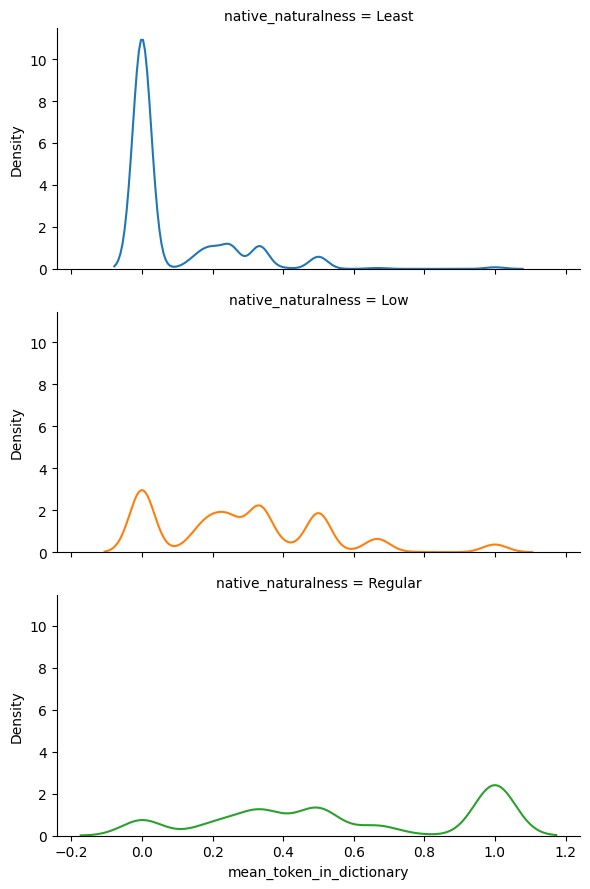

In [29]:
g = sns.FacetGrid(
    data=ident_nat_df.reset_index().query("native_naturalness != 'Unknown'"),
    row="native_naturalness",
    hue="native_naturalness",
    aspect=2
)
g.map(
    sns.kdeplot,
    "mean_token_in_dictionary",
)

<Axes: xlabel='mean_relative_edit_distance', ylabel='Count'>

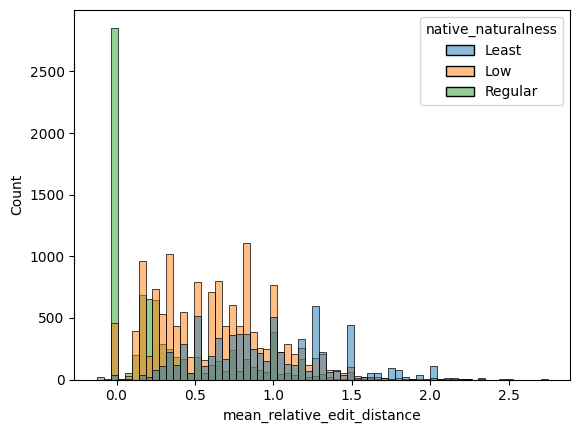

In [30]:
sns.histplot(
    data=ident_nat_df.query("native_naturalness != 'Unknown'"),
    x="mean_relative_edit_distance",
    hue="native_naturalness"
)

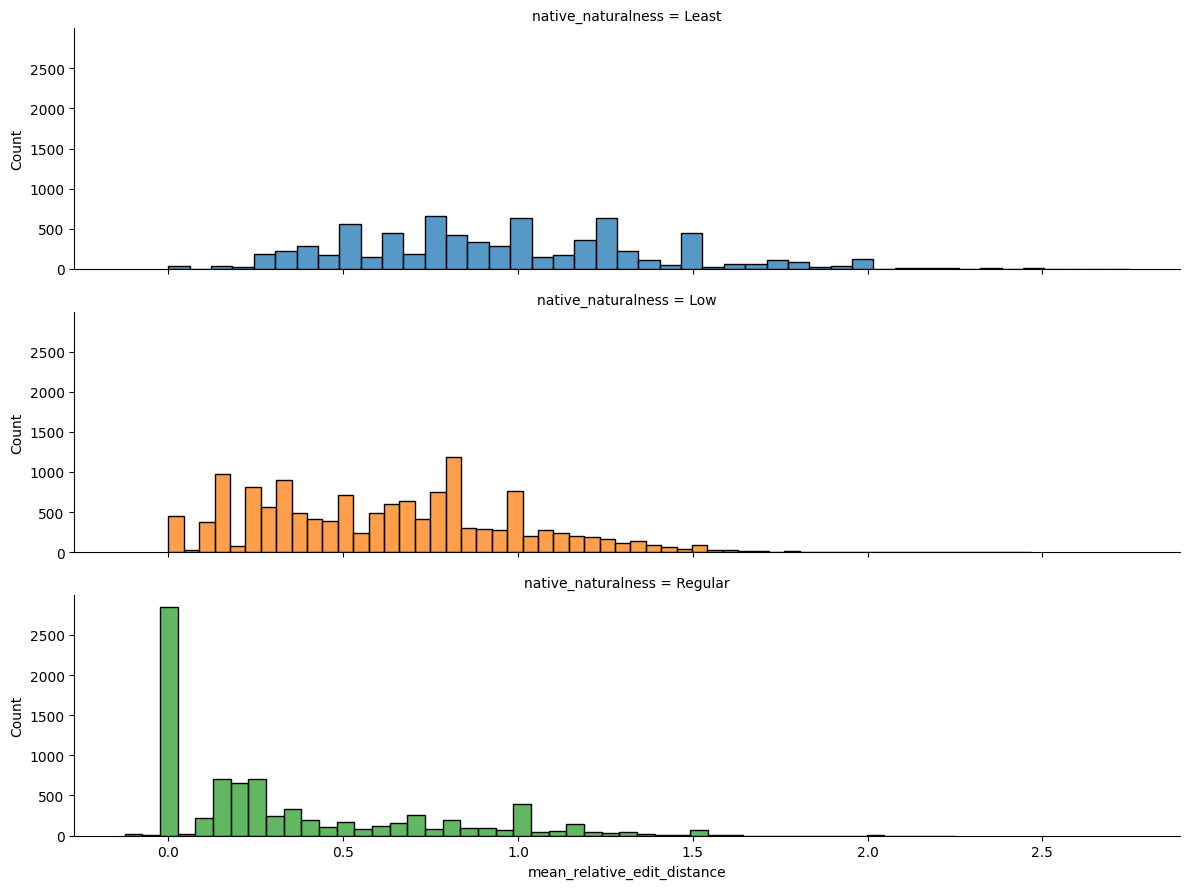

In [31]:
g = sns.FacetGrid(
    data=ident_nat_df.reset_index().query("native_naturalness != 'Unknown'"),
    row="native_naturalness",
    hue="native_naturalness",
    aspect=4
)
g.map(
    sns.histplot,
    "mean_relative_edit_distance",
)

In [32]:
ident_df_melted = ident_nat_df.reset_index().melt(
    id_vars=["native_naturalness", "source_database", "native_identifier"],
    value_vars=[
        "sum_token_nat_dist", 
        "sum_token_char_len", 
        # "mean_token_in_dictionary", 
        "mean_token_nat_dist", 
        "mean_token_char_len"]
)
ident_df_melted.head(3)

,native_naturalness,source_database,native_identifier,variable,value
0,Least,ASIS_20161108_HerpInv_Database,EstHError,sum_token_nat_dist,3.0
1,Least,ASIS_20161108_HerpInv_Database,LatY,sum_token_nat_dist,3.0
2,Least,ASIS_20161108_HerpInv_Database,LonX,sum_token_nat_dist,5.0


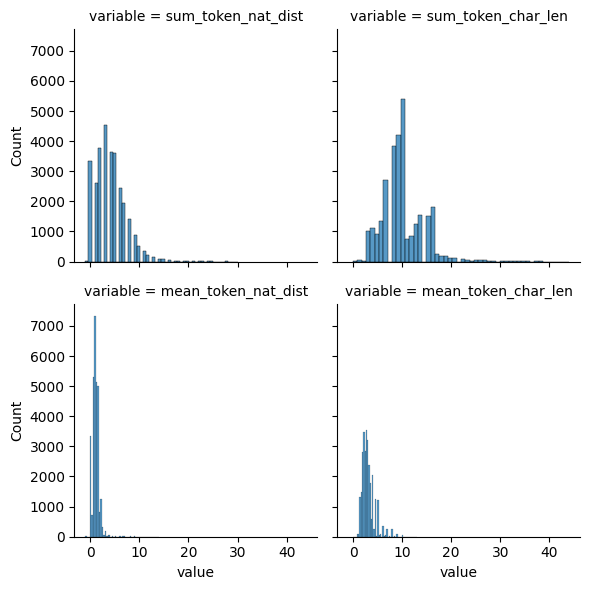

In [33]:
g = sns.FacetGrid(
    ident_df_melted,
    col="variable",
    col_wrap=2
)
g.map(
    sns.histplot,
    "value",
    bins=50
)